In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np
import cv2
import os

In [2]:
step = 0.001

In [3]:
x = np.arange(0 + step, 1 + step, step)

In [4]:
size = lambda obj: obj[2] * obj[3]

In [5]:
xclash = lambda tar, obj: 0 if tar[0] + tar[2] < obj[0] or obj[0] + obj[2] < tar[0] else max(tar[0] + tar[2] - obj[0], obj[0] + obj[2] - tar[0])

In [6]:
yclash = lambda tar, obj: 0 if tar[1] + tar[3] < obj[1] or obj[1] + obj[3] < tar[1] else max(tar[1] + tar[3] - obj[1], obj[3] + obj[3] - tar[1])

In [7]:
clash = lambda tar, obj: xclash(tar, obj) * yclash(tar, obj) / size(obj)

In [8]:
overlap = lambda tar, obj, rat: clash(tar, obj) >= rat

In [9]:
performonce = lambda t, o: sum([overlap(t, o, r) for r in x]) / len(x)

In [10]:
performance = lambda tar, obj, rat: [sum([overlap(t, o, r) for t, o in zip(tar, obj)])/len(tar) for r in rat]

In [11]:
perframe = lambda tar, obj: [sum([overlap(t, o, r) for r in x]) / len(x) for t, o in zip(tar, obj)]

In [12]:
scale = lambda box, ratio=0.01: [box[0] - box[2] * ratio, box[1] - box[3] * ratio, box[2] + box[2] * ratio * 2, box[3] + box[3] * ratio * 2]

## test py-MDNet

In [15]:
def parse(line):
    return list(map(int, re.split(';|,| |\t', line.replace('\n', ''))))

AUC of Basketball 0.99767862069


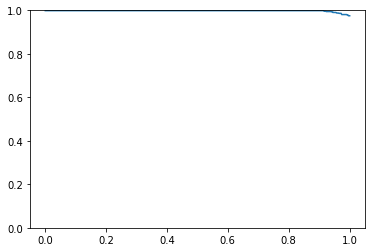

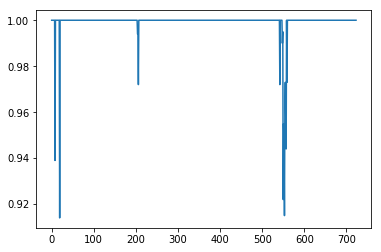

AUC of Bird1 0.615112745098


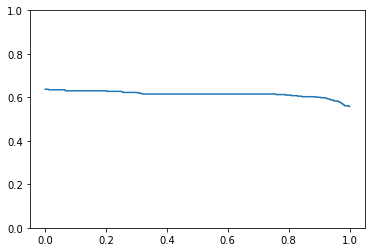

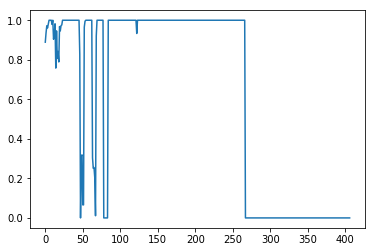

AUC of Bolt 0.991605714286


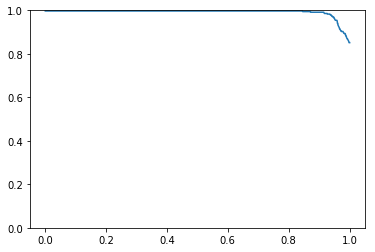

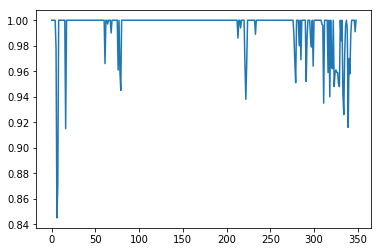

AUC of Car1 0.998984313725


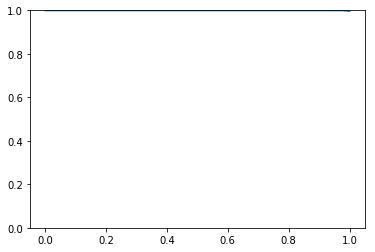

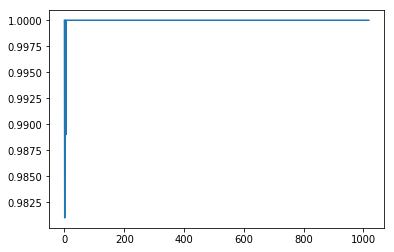

AUC of Diving 0.916593073593


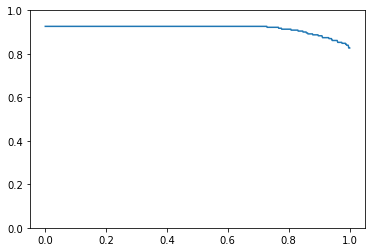

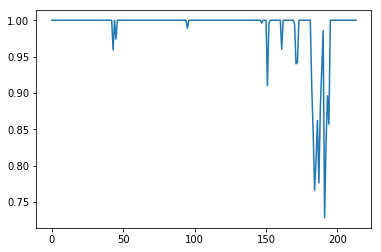

AUC of Football 0.997237569061


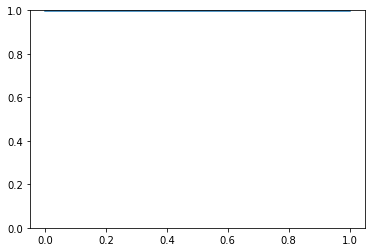

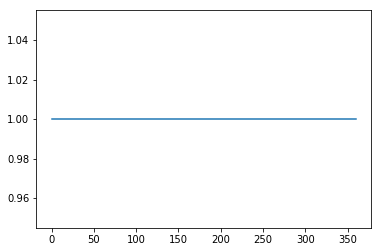

AUC of Ironman 0.649692771084


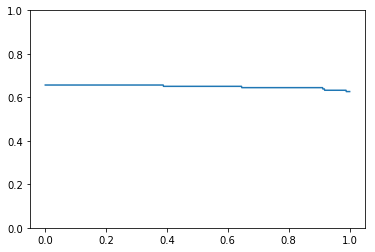

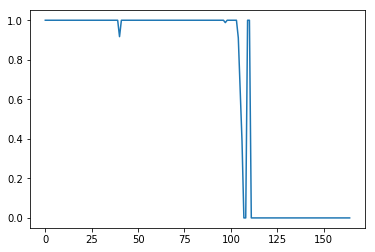

AUC of Matrix 0.73354


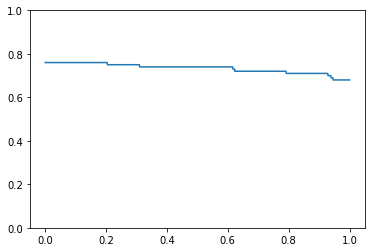

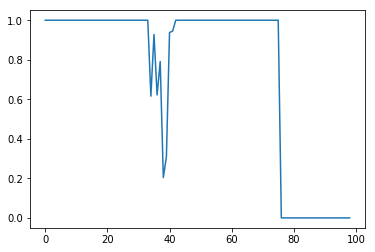

AUC of Soccer 0.966788265306


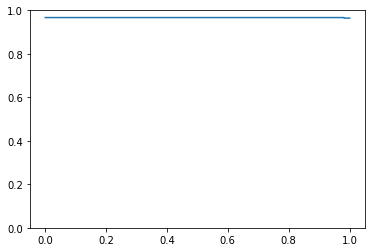

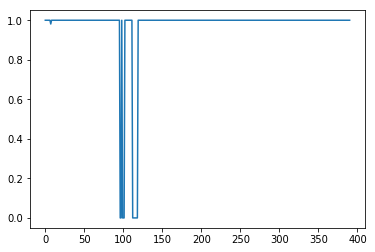

AUC of Surfer 0.966098404255


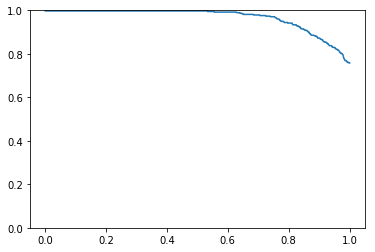

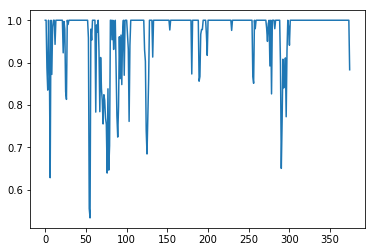

0.88333314771


In [17]:
total = 0
for d in [
    'Basketball',
    'Bird1',
    'Bolt',
    'Car1',
    'Diving',
    'Football',
    'Ironman',
    'Matrix',
    'Soccer',
    'Surfer']:
    with open('../train/' + d + '/bounding_rect.txt') as f:
        results = list(map(lambda x: list(map(float, x.split(','))), f.readlines()))
    with open('../train/' + d + '/groundtruth_rect.txt') as f:
        truths = list(map(parse, f.readlines()))
    truths = truths[1:]
#     results = list(map(scale, results))
    perf = performance(results, truths, x)
    print ('AUC of {}'.format(d), sum(perf) / len(x))
    total += sum(perf) / len(x)
    plt.plot(x, perf);plt.ylim(0, 1);plt.show()
    results = results[:len(truths)]
    truths = truths[:len(results)]
    frame = perframe(results, truths)
    plt.plot(range(len(truths)), frame); plt.show()
print (total / 10)

## Visual check

In [ ]:
data_set = 'Basketball'

In [ ]:
with open('../bbox_' + data_set + '.txt') as f:
    results = list(map(lambda x: list(map(float, x.split(','))), f.readlines()))
with open('../train/' + data_set + '/groundtruth_rect.txt') as f:
    truths = list(map(lambda x: list(map(float, x.split(','))), f.readlines()))

In [ ]:
begin = 640
for file, truth, result in zip(sorted(os.listdir('../train/{}/img'.format(data_set)))[begin:], truths[begin:], results[begin:]):
    img = cv2.imread('../train/{}/img/{}'.format(data_set, file))
    tx, ty, tw, th = map(int, truth)
    rx, ry, rw, rh = map(int, scale(result))
    img = cv2.rectangle(img, (tx, ty), (tx + tw, ty + th), (255, 121, 0), 3)
    img = cv2.rectangle(img, (rx, ry), (rx + rw, ry + rh), (64, 255, 64), 3)
    print (file, truth, result, performonce(truth, result))
    plt.imshow(img); plt.show()